# COMPSCI 753 Assignment 2

- UPI: shi995
- Name: Wennan Shi
- Student ID: 967146402

## Part 0: Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import json
import math
import time
import random
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reload local python files every 2 seconds
%load_ext autoreload
%autoreload 2

In [4]:
# Set random seed
RANDOM_STATE = 0
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

## Part I: Brute Force Approach and Performance Evaluation

### (a) Compute the average frequency of the tracks/songs in the data stream

In [5]:
# Load the dataset
with open('challenge_set.json', 'r') as f:
    data = json.load(f)

In [6]:
# Extract all tracks
trackList = []
for playlist in data['playlists']:
    if len(playlist['tracks']) != 0:
        for track in playlist['tracks']:
            trackList.append((track['track_name'], track['track_uri'][14:]))

The length of the "trackList" is the number of all tracks, using "set()" to remove duplicate tracks, and the remaining list length is the number of unique tracks.  
By the number of total tracks dividing the number of unique tracks, we get the average frequency of the tracks.

In [7]:
# Compute the average frequency
totalTracks = len(trackList)
uniqueTracks = len(set(trackList))
avgFreq = round(totalTracks / uniqueTracks, 5)
print("The number of total tracks is: ", totalTracks, "\n",
      "The number of unique tracks is: ", uniqueTracks, "\n",
      "The average frequency of tracks is: ", avgFreq, sep = "")

The number of total tracks is: 281000
The number of unique tracks is: 66243
The average frequency of tracks is: 4.24196


### (b) Compute the frequencies of all tracks

In [8]:
# Define a function to convert Counter result to dataframe
def Counter_to_dataframe(c):
    # Extract columns
    track_name = []
    track_uri = []
    frequency = []
    for i in c:
        track_name.append(i[0][0])
        track_uri.append(i[0][1])
        frequency.append(i[1])
    # Combine all columns to generate dataframe
    df = pd.DataFrame({"Track_name": track_name, "Track_uri": track_uri, "Frequency": frequency})
    return df

We use "collections.Counter()" to count the frequency of all tracks and use "most_common()" to sort in descending order.

In [9]:
# Compute the frequencies of all tracks in descending order
c = collections.Counter(trackList).most_common()
# Convert Counter result to dataframe
df_true = Counter_to_dataframe(c)
# Preview Top-20
df_true.head(20)

,Track_name,Track_uri,Frequency
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206
5,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,202
6,Jumpman,27GmP9AWRs744SzKcpJsTZ,198
7,One Dance,1xznGGDReH1oQq0xzbwXa3,197
8,No Problem (feat. Lil Wayne & 2 Chainz),0v9Wz8o0BT8DU38R4ddjeH,196
9,Bad and Boujee (feat. Lil Uzi Vert),4Km5HrUvYTaSUfiSGPJeQR,186


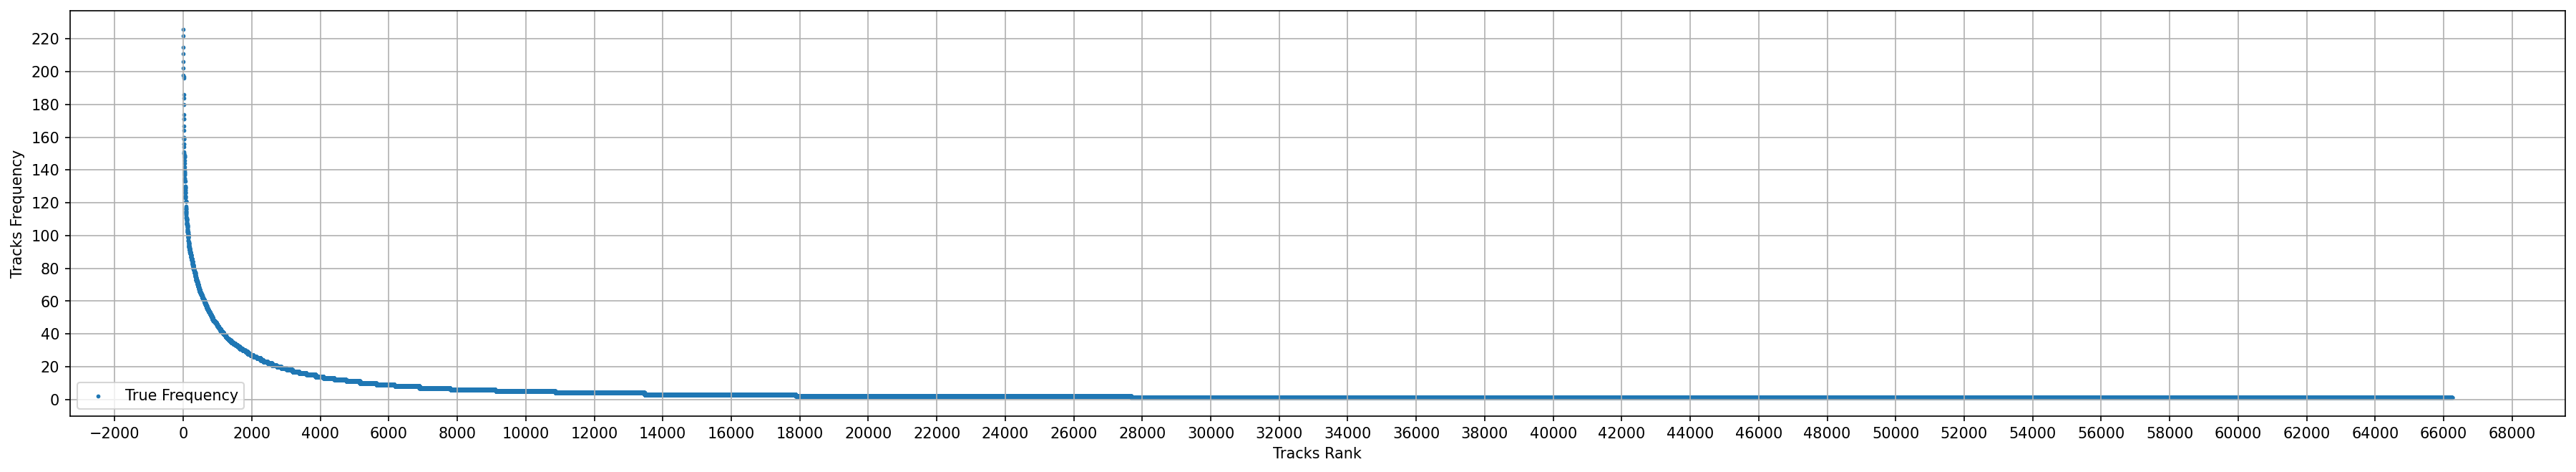

In [10]:
# Plot the frequencies of all tracks in descending order
plt.figure(dpi = 150, figsize = (30,5))
plt.scatter(range(len(df_true.Track_uri)), df_true.Frequency, s = 3, label = 'True Frequency')
plt.legend(loc = 'lower left')
plt.xlabel("Tracks Rank")
plt.ylabel("Tracks Frequency")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2000))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.grid()
plt.show()

From the above plot, we can observe that the track frequency distribution is severely skewed.  
In more than 66000+ unique tracks, only about 140 tracks frequency above 100, about 2000 tracks frequency above 20, and about 60% of tracks frequency is only 1.

## Part II: Misra-Gries Approach and Performance Evaluation

### (a) Implement Misra-Gries summary to find the most frequent tracks

In [11]:
# Define Misra-Gries function
def misra_gries(m, k):
    dic = {}
    for i in m:
        if i in dic:
            dic[i] += 1
        elif len(dic) < k:
            dic[i] = 1
        else:
            for j in list(dic):
                dic[j] -= 1
                if dic[j] == 0:
                    dic.pop(j)
    return dic

Here, we choose k=20000 to implement the Misra-Gries algorithm.  
In Part III (a), we will also choose k=20000 to implement the Count Sketch algorithm. Choosing the same k can facilitate us to compare the performance of the two algorithms.  
In Part III (c), we will choose 5 different k values to explore the impact of the size of k on the two algorithm results.

In [12]:
# Implement Misra-Gries approach to compute the frequencies in descending order
m = trackList
k = 20000
c = collections.Counter(misra_gries(m, k)).most_common()
# Convert Counter result to dataframe
df_Misra_Gries = Counter_to_dataframe(c)
# Preview Top-20
df_Misra_Gries.head(20)

,Track_name,Track_uri,Frequency
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,219
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,215
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,208
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,204
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,199
5,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,195
6,Jumpman,27GmP9AWRs744SzKcpJsTZ,191
7,One Dance,1xznGGDReH1oQq0xzbwXa3,190
8,No Problem (feat. Lil Wayne & 2 Chainz),0v9Wz8o0BT8DU38R4ddjeH,189
9,Bad and Boujee (feat. Lil Uzi Vert),4Km5HrUvYTaSUfiSGPJeQR,179


From the above result, we can observe that when k=20000, the head rankings estimated by the Misra-Gries algorithm are consistent with the true rankings. We will discuss this in more detail in Part II (b).

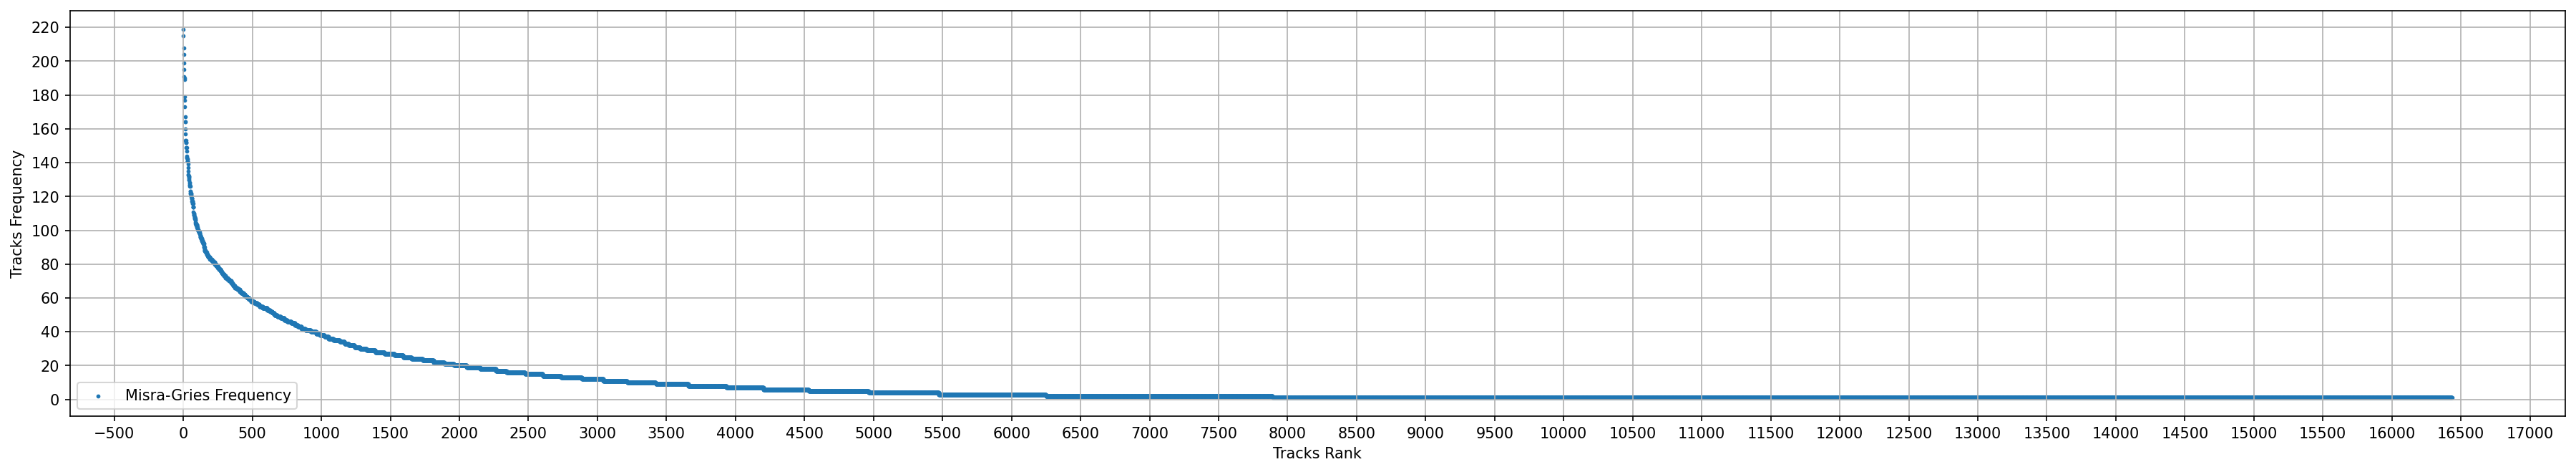

In [13]:
# Plot the frequencies in descending order
plt.figure(dpi = 150, figsize = (30,5))
plt.scatter(range(len(df_Misra_Gries.Track_uri)), df_Misra_Gries.Frequency, s = 3, label = 'Misra-Gries Frequency')
plt.legend(loc = 'lower left')
plt.xlabel("Tracks Rank")
plt.ylabel("Tracks Frequency")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(500))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.grid()
plt.show()

From the above plot, we can observe that when k=20000, the frequency distribution presented by the Misra-Gries algorithm is similar to the true frequency distribution, indicating that for those tracks with higher frequencies, the Misra-Gries algorithm can capture them well.

### (b) Compare the estimated frequency of all tracks from the generated Misra-Gries summary with their true frequencies from Part I(b)

In [14]:
# Define relative error function
def rel_error(esti_freq, true_freq):
    rel_error = abs(1 - (esti_freq / true_freq))
    return rel_error

In [15]:
# Merge df_true and df_Misra_Gries
df_true_MG_compare = pd.merge(df_true, df_Misra_Gries, on = 'Track_uri', how='outer')
# Drop the duplicate column
df_true_MG_compare.drop(columns = ['Track_name_y'], inplace = True)
# Rename to avoid confusion
df_true_MG_compare.columns = ['Track_name', 'Track_uri', 'True_Frequency', 'Est_Frequency']
# For those tracks that do not appear in the Misra_Gries summary, we treat their frequency as 0
df_true_MG_compare.fillna(0, inplace = True)
df_true_MG_compare['Est_Frequency'] = df_true_MG_compare['Est_Frequency'].astype(int)
# Reorder by estimated frequency in descending order
df_true_MG_compare.sort_values(by = ['Est_Frequency'], ascending = False, inplace = True)
df_true_MG_compare.reset_index(drop = True, inplace = True)
# Check the difference between estimated and true frequency
df_true_MG_compare['Difference'] = df_true_MG_compare['Est_Frequency'] - df_true_MG_compare['True_Frequency']
# Calculate relative error
df_true_MG_compare['Relative_Error'] = rel_error(df_true_MG_compare['Est_Frequency'], df_true_MG_compare['True_Frequency'])
# Preview
df_true_MG_compare

,Track_name,Track_uri,True_Frequency,Est_Frequency,Difference,Relative_Error
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,219,-7,0.030973
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,215,-7,0.031532
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215,208,-7,0.032558
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,204,-7,0.033175
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206,199,-7,0.033981
...,...,...,...,...,...,...
66238,Formerly Known (feat. Co Campbell),5A9Qe31uGQkmbWd94gX3NT,1,0,-1,1.000000
66239,Young (feat. Kb),7EA6cdI785gnFW172RqsYk,1,0,-1,1.000000
66240,Unashamed,4FKsIUZNP1ceqOUrL1Njol,1,0,-1,1.000000
66241,Somebody - Remastered,4jrMslkQYy6HVqKKPX2WXf,1,0,-1,1.000000


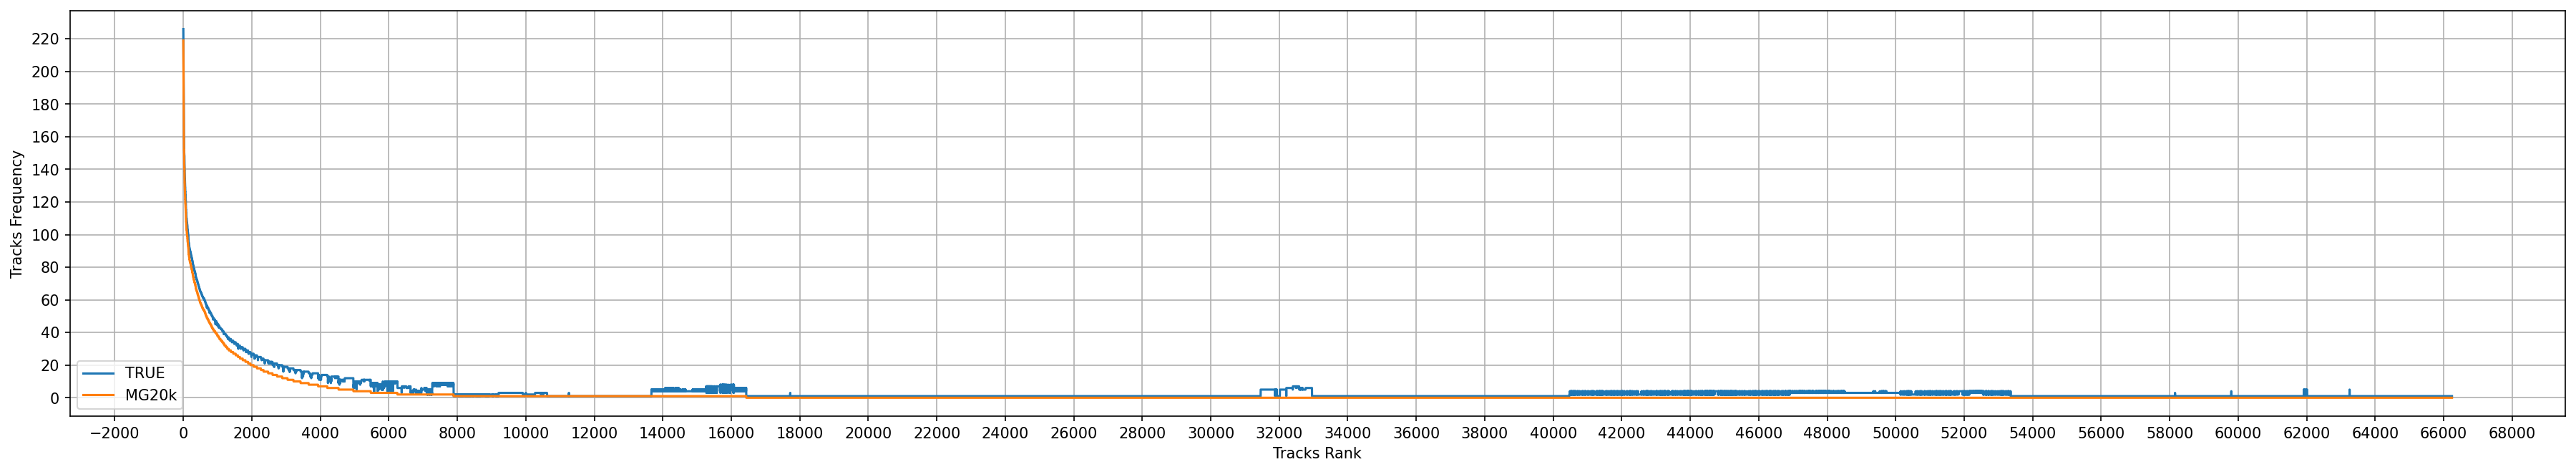

In [16]:
# Plot the Est_Frequency in descending order
plt.figure(dpi = 150, figsize = (30,5))
plt.plot(df_true_MG_compare.True_Frequency, label = 'TRUE')
plt.plot(df_true_MG_compare.Est_Frequency, label = 'MG20k')
plt.legend(loc = 'lower left')
plt.xlabel("Tracks Rank")
plt.ylabel("Tracks Frequency")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2000))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.grid()
plt.show()

From the above plot, we can observe that when k=20000, the frequency distribution presented by the Misra-Gries algorithm is very close to the true frequency distribution, but in general, the Misra-Gries algorithm will lead to underestimation (the estimated distribution is below the true distribution).  
This is caused by k. When k is smaller, the Misra-Gries algorithm will underestimate more. When k is larger, the estimated frequency will be closer to the true frequency.

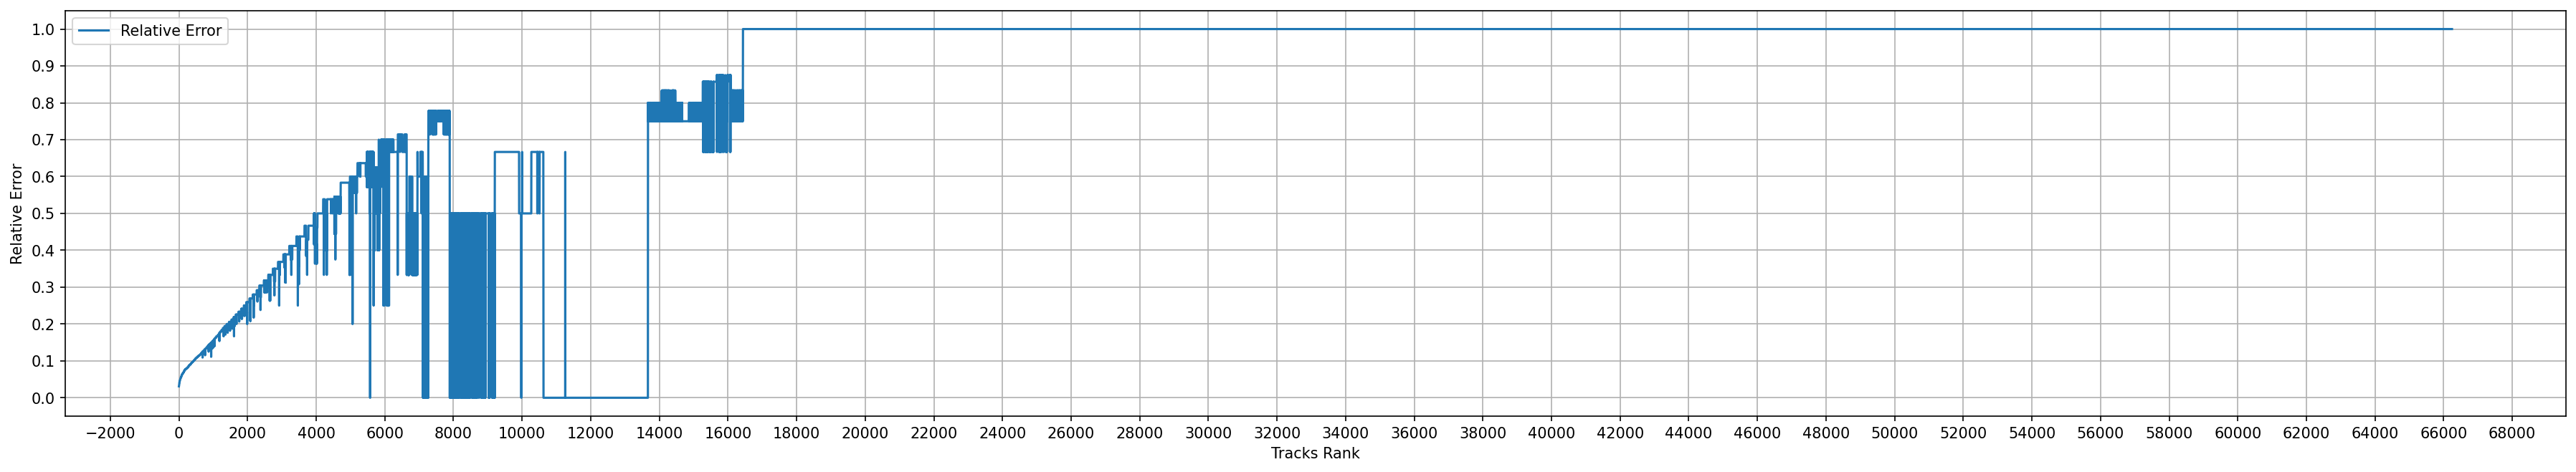

In [17]:
# Plot Relative Error vs estimated frequency rank
plt.figure(dpi = 150, figsize = (30,5))
plt.plot(df_true_MG_compare.Relative_Error, label = 'Relative Error')
plt.legend(loc = 'upper left')
plt.xlabel("Tracks Rank")
plt.ylabel("Relative Error")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2000))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.grid()
plt.show()

From the above plot, we can observe that when k=20000, head-ranked tracks with less relative error. As the ranking goes down, the relative error gradually rises, after about 16000 tracks, the relative error is constant at 1. Because m' is usually less than k, which causes those tracks with lower true frequencies not to appear in the Misra-Gries summary, we treat these tracks' frequency as 0, so their relative error will be 1.

In [18]:
# Report the top-20 tracks with the estimated frequencies in descending order
df_true_MG_compare.head(20)

,Track_name,Track_uri,True_Frequency,Est_Frequency,Difference,Relative_Error
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,219,-7,0.030973
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,215,-7,0.031532
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215,208,-7,0.032558
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,204,-7,0.033175
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206,199,-7,0.033981
5,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,202,195,-7,0.034653
6,Jumpman,27GmP9AWRs744SzKcpJsTZ,198,191,-7,0.035354
7,One Dance,1xznGGDReH1oQq0xzbwXa3,197,190,-7,0.035533
8,No Problem (feat. Lil Wayne & 2 Chainz),0v9Wz8o0BT8DU38R4ddjeH,196,189,-7,0.035714
9,Bad and Boujee (feat. Lil Uzi Vert),4Km5HrUvYTaSUfiSGPJeQR,186,179,-7,0.037634


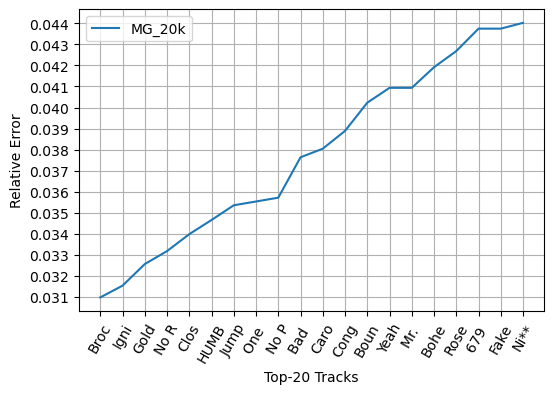

In [19]:
# Report the curve plot of the relative error for top-20 tracks
x = df_true_MG_compare[:20]['Track_name'].str[:4]
y = df_true_MG_compare[:20]['Relative_Error']
plt.figure(dpi = 100)
plt.plot(x, y, label = 'MG_20k')
plt.legend(loc = 'upper left')
plt.xlabel('Top-20 Tracks')
plt.ylabel('Relative Error')
plt.xticks(rotation = 60)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.001))
plt.grid()
plt.show()

From the above plot, we can observe that when k=20000, the relative error of the top 20 tracks is very small, i.e. very close to the true frequency. So we conclude that for those tracks with higher frequencies,  the Misra-Gries algorithm performs well.

### (c) Run Misra-Gries summary and report the number of decrement steps with chosen parameter

In [20]:
# Define a function to count Misra-Gries decrement steps
def MG_decrement_steps(m, k):
    dic = {}
    # Set up a counter to record the number of decrement steps are triggered
    decrement = 0
    for i in m:
        if i in dic:
            dic[i] += 1
        elif len(dic) < k:
            dic[i] = 1
        else:
            # Counter is triggered
            decrement += 1
            for j in list(dic):
                dic[j] -= 1
                if dic[j] == 0:
                    dic.pop(j)
    return decrement

We add a counter to the Misra-Gries algorithm, every time the decrement step occurs, the counter will be triggered +1.

In [21]:
m = trackList
# When k=20000
k = 20000
print("When k=20000, the number of decrement steps is:", MG_decrement_steps(m, k))

When k=20000, the number of decrement steps is: 7


## Part III: Count Sketch Approach and Performance Evaluation

### (a) Implement Count Sketch Algorithm to find the most frequent tracks

#### 0. Define functions

In [22]:
# Define a function to calculate w, d, k
def calc_wdk(epsilon, delta):
    # Calculate w, d, k
    w = math.ceil(2 / pow(epsilon, 2))
    d = math.ceil(math.log10(1 / delta))
    k = w * d
    return w, d, k

In [23]:
# Define a function to generate the parameters of hash function and sign hash function
def hash_and_sign(d):
    # Create a large prime list
    primeList = [100003, 110017, 120011, 130003, 140009, 150001, 160001, 170003, 180001, 190027]
    # Create lists to store parameters
    hash_params = []
    sign_params = []
    # Randomly generate the parameters
    for i in range(d):
        # Pick a large prime number p
        hash_p = random.choice(primeList)
        sign_p = random.choice(primeList)
        # Pick a random pair of integers 0 < a ≤ p, 0 < b ≤ p
        hash_a = random.randint(1, hash_p + 1)
        hash_b = random.randint(1, hash_p + 1)
        sign_a = random.randint(1, sign_p + 1)
        sign_b = random.randint(1, sign_p + 1)
        hash_params.append([hash_a, hash_b, hash_p])
        sign_params.append([sign_a, sign_b, sign_p])
    return [hash_params, sign_params]

#### 1. Assign id to all tracks

For each unique track, we assign a numerical id to facilitate subsequent hash operations.

In [24]:
# Assign id to all tracks
df_with_id = pd.DataFrame(trackList)
df_with_id.columns = ['Track_name', 'Track_uri']
# Same track_uri will be assigned to the same id
df_with_id['Track_id'] = pd.factorize(df_with_id['Track_uri'])[0]
# Preview
df_with_id

,Track_name,Track_uri,Track_id
0,Little Swing,66U0ASk1VHZsqIkpMjKX3B,0
1,I'm an Albatraoz,5MhsZlmKJG6X5kTHkdwC4B,1
2,Yellow Flicker Beat - From The Hunger Games: M...,0GZoB8h0kqXn7XFm4Sj06k,2
3,White Teeth Teens,35kahykNu00FPysz3C2euR,3
4,Team,3G6hD9B2ZHOsgf4WfNu7X1,4
...,...,...,...
280995,Y No Hago Mas Na' - Reggaeton Mix,38griAVM808crjbFp9gcPD,66241
280996,California Love - Original Version,1JClFT74TYSXlzpagbmj0S,3490
280997,Intoxicated,4InLm5a9Qtkru6YxEjM4Qc,66242
280998,90210 (feat. G-Eazy),4hdog9vyyqG9pcppG2Izek,17771


#### 2. Choose parameters, create hash function and sign function

Here, we choose k=20000 to implement the Count Sketch algorithm, it is the same as the k value chosen by the Misra-Gries algorithm in Part II (a).  
Choosing the same k can facilitate us to compare the performance of the two algorithms.

In [25]:
# Choose parameters
epsilon = 0.02
delta = 0.0001
# Calculate w, d, k
wdk = calc_wdk(epsilon, delta)
print("w = ", wdk[0], "; d = ", wdk[1], "; k = ", wdk[2], sep = "")

w = 5000; d = 4; k = 20000


In [26]:
# Create hash function h = ((ax + b) mod p) mod w
hash_params = hash_and_sign(wdk[1])[0]
def h1(x):
    return ((hash_params[0][0] * x + hash_params[0][1]) % hash_params[0][2]) % wdk[0]
def h2(x):
    return ((hash_params[1][0] * x + hash_params[1][1]) % hash_params[1][2]) % wdk[0]
def h3(x):
    return ((hash_params[2][0] * x + hash_params[2][1]) % hash_params[2][2]) % wdk[0]
def h4(x):
    return ((hash_params[3][0] * x + hash_params[3][1]) % hash_params[3][2]) % wdk[0]
# Create sign hash function s = ((ax + b) mod p) mod 2
sign_params = hash_and_sign(wdk[1])[1]
def s1(x):
    return ((sign_params[0][0] * x + sign_params[0][1]) % sign_params[0][2]) % 2
def s2(x):
    return ((sign_params[1][0] * x + sign_params[1][1]) % sign_params[1][2]) % 2
def s3(x):
    return ((sign_params[2][0] * x + sign_params[2][1]) % sign_params[2][2]) % 2
def s4(x):
    return ((sign_params[3][0] * x + sign_params[3][1]) % sign_params[3][2]) % 2

#### 3. Generate hash matrix and sign matrix

In [27]:
# Extract unique id, initialize hash matrix and sign matrix
df_unique_id = df_with_id[['Track_id']].drop_duplicates().sort_values('Track_id')
df_unique_id.columns = ['Elements']
df_unique_id.index = range(len(df_unique_id['Elements']))

In [28]:
# Generate hash matrix
hash_matrix = df_unique_id.copy(deep = True)
# Calculate hash value and put into matrix
hash_matrix['h1(x)'] = h1(hash_matrix['Elements'])
hash_matrix['h2(x)'] = h2(hash_matrix['Elements'])
hash_matrix['h3(x)'] = h3(hash_matrix['Elements'])
hash_matrix['h4(x)'] = h4(hash_matrix['Elements'])
# Transpose to horizontal
hash_matrix_H = hash_matrix.T
# Preview
hash_matrix_H

,0,1,2,3,4,5,6,7,8,9,...,66233,66234,66235,66236,66237,66238,66239,66240,66241,66242
Elements,0,1,2,3,4,5,6,7,8,9,...,66233,66234,66235,66236,66237,66238,66239,66240,66241,66242
h1(x),2874,3487,4100,4713,326,939,1552,2165,2778,3390,...,4310,4923,536,1149,1762,2374,2987,3600,4213,4826
h2(x),3861,3798,3735,3673,3610,3547,3484,3421,3359,3296,...,696,634,571,508,445,382,320,257,194,131
h3(x),4065,2382,688,4005,2322,639,3956,2273,579,3896,...,2727,1044,4350,2667,984,4301,2618,935,4241,2558
h4(x),1304,4830,3356,1881,407,3933,2459,985,4510,3036,...,4686,3212,1738,263,3789,2315,841,4367,2892,1418


In [29]:
# Generate sign matrix
sign_matrix = df_unique_id.copy(deep = True)
# Calculate sign value and put into matrix
sign_matrix['s1(x)'] = - s1(sign_matrix['Elements']) | 1
sign_matrix['s2(x)'] = - s2(sign_matrix['Elements']) | 1
sign_matrix['s3(x)'] = - s3(sign_matrix['Elements']) | 1
sign_matrix['s4(x)'] = - s4(sign_matrix['Elements']) | 1
# Transpose to horizontal
sign_matrix_H = sign_matrix.T
# Preview
sign_matrix_H

,0,1,2,3,4,5,6,7,8,9,...,66233,66234,66235,66236,66237,66238,66239,66240,66241,66242
Elements,0,1,2,3,4,5,6,7,8,9,...,66233,66234,66235,66236,66237,66238,66239,66240,66241,66242
s1(x),1,1,-1,-1,1,1,-1,-1,-1,1,...,-1,1,1,-1,-1,1,1,-1,-1,1
s2(x),1,-1,-1,1,-1,-1,1,-1,-1,1,...,1,-1,1,1,-1,1,1,-1,1,1
s3(x),-1,1,-1,1,-1,1,-1,1,-1,1,...,-1,1,-1,1,-1,1,-1,1,-1,1
s4(x),1,-1,-1,-1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,1,1,1,-1,-1,-1


#### 4. Generate counter matrix

In [30]:
# Initialize the counter matrix
counter_matrix = np.zeros([wdk[1], wdk[0]], int)
'''
Note: The following algorithm will take around 20s ~ 30s depending on computer performance.
'''
# Compute the estimated frequency for the data stream
for i in df_with_id['Track_id']:
    hash_value = [hash_matrix_H.iloc[1, i], hash_matrix_H.iloc[2, i],
                  hash_matrix_H.iloc[3, i], hash_matrix_H.iloc[4, i]]
    sign_value = [sign_matrix_H.iloc[1, i], sign_matrix_H.iloc[2, i],
                  sign_matrix_H.iloc[3, i], sign_matrix_H.iloc[4, i]]
    counter_matrix[0][hash_value[0]] += sign_value[0]
    counter_matrix[1][hash_value[1]] += sign_value[1]
    counter_matrix[2][hash_value[2]] += sign_value[2]
    counter_matrix[3][hash_value[3]] += sign_value[3]

In [31]:
# Convert to dataframe
counter_matrix_H = pd.DataFrame(counter_matrix)
counter_matrix_H.index = ['h1(x)', 'h2(x)', 'h3(x)', 'h4(x)']
# Preview
counter_matrix_H

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
h1(x),-1,-28,-118,3,17,-26,-1,-101,-85,24,...,-33,40,-7,-3,13,-26,-7,-73,-53,4
h2(x),39,-9,-9,3,-1,-10,-11,6,-96,9,...,25,-30,41,-27,-2,-31,53,20,-19,-3
h3(x),-29,3,-5,11,13,10,17,-23,-104,-25,...,24,-20,2,-19,-5,-90,24,18,4,-40
h4(x),12,23,-14,35,-70,-32,55,-11,-9,-1,...,-19,-34,-6,99,28,92,-15,-3,182,8


#### 5. Estimate frequencies

In [32]:
# Create a list to store estimated frequency
Estimated_Frequency = []
'''
Note: The following algorithm will take around 10s ~ 20s depending on computer performance.
'''
# Find the sign value in counter matrix and calculate the median
for i in df_unique_id['Elements']:
    # Get the position in counter matrix
    hash_value = [hash_matrix_H.iloc[1, i], hash_matrix_H.iloc[2, i],
                  hash_matrix_H.iloc[3, i], hash_matrix_H.iloc[4, i]]
    # Get sign value
    sign_value_in_counter_matrix = [counter_matrix_H.iloc[0, hash_value[0]],
                                    counter_matrix_H.iloc[1, hash_value[1]],
                                    counter_matrix_H.iloc[2, hash_value[2]],
                                    counter_matrix_H.iloc[3, hash_value[3]]]
    # Calculate the median
    est_freq = np.median(sign_value_in_counter_matrix)
    Estimated_Frequency.append(est_freq)

In [33]:
# Convert to dataframe
Est_Freq_matrix = df_unique_id.copy(deep = True)
Est_Freq_matrix.columns = ['Track_id']
Est_Freq_matrix['Frequency'] = pd.DataFrame(Estimated_Frequency)
Est_Freq_matrix['Track_id'] = Est_Freq_matrix['Track_id'].astype(object)
# Transpose to horizontal
Est_Freq_matrix_H = Est_Freq_matrix.T
# Preview
Est_Freq_matrix_H

,0,1,2,3,4,5,6,7,8,9,...,66233,66234,66235,66236,66237,66238,66239,66240,66241,66242
Track_id,0,1,2,3,4,5,6,7,8,9,...,66233,66234,66235,66236,66237,66238,66239,66240,66241,66242
Frequency,-29.5,-1.0,-20.0,3.0,-6.0,41.5,32.0,-9.5,-44.5,61.5,...,10.5,-3.5,-2.5,28.5,-7.5,18.0,14.5,-12.0,-4.0,-5.5


#### 6. Generate Count Sketch results

In [34]:
# Generate unique id dataframe including Track_name and Track_uri
df_with_unique_id = df_with_id.drop_duplicates(subset = ['Track_uri'])
# Merge df_with_unique_id and Est_Freq_matrix
df_Count_Sketch = pd.merge(df_with_unique_id, Est_Freq_matrix, on = ['Track_id', 'Track_id'])
# Sort by estimated frequencies in descending order 
df_Count_Sketch.sort_values(by = ['Frequency'], ascending = False, inplace = True)
# Reset index start from 0
df_Count_Sketch.reset_index(drop = True, inplace = True)
# Preview
df_Count_Sketch

,Track_name,Track_uri,Track_id,Frequency
0,Jumpman,27GmP9AWRs744SzKcpJsTZ,754,196.0
1,No Problem (feat. Lil Wayne & 2 Chainz),0v9Wz8o0BT8DU38R4ddjeH,3684,192.5
2,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,748,178.5
3,Trap Queen,2d8JP84HNLKhmd6IYOoupQ,393,151.5
4,Buy U a Drank (Shawty Snappin'),4gFXY5yvHayGckJndafYQE,1814,142.5
...,...,...,...,...
66238,Black Beatles,6fujklziTHa8uoM5OQSfIo,3066,-146.5
66239,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,746,-187.5
66240,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,1072,-210.0
66241,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,1415,-213.0


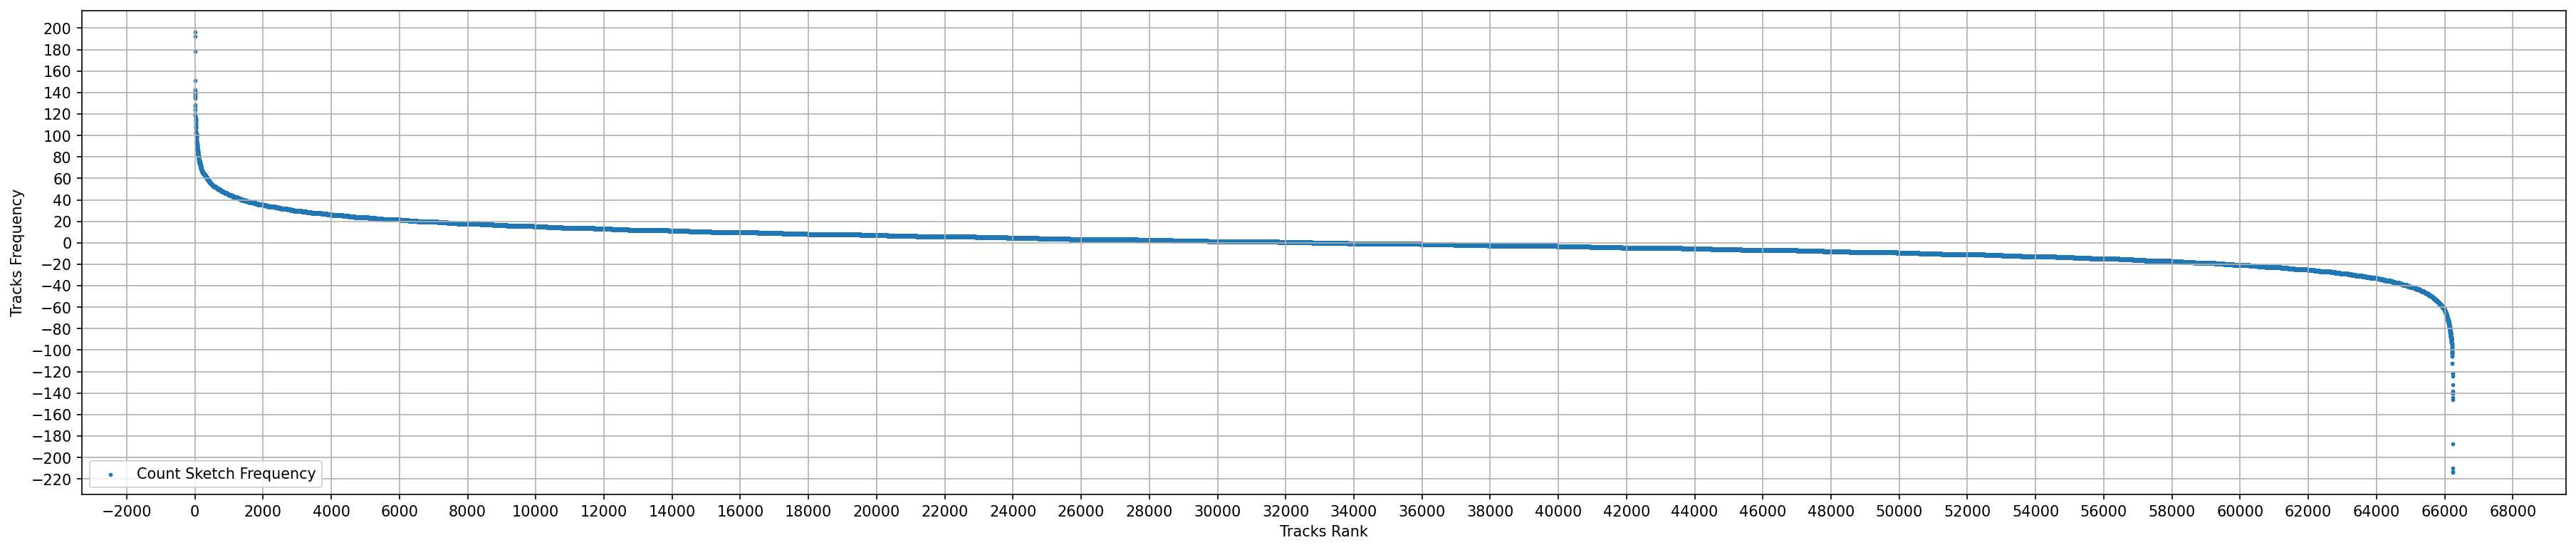

In [35]:
# Plot the frequencies of all tracks in descending order
plt.figure(dpi = 150, figsize = (30,6))
plt.scatter(range(len(df_Count_Sketch.Track_uri)), df_Count_Sketch.Frequency, s = 3, label = 'Count Sketch Frequency')
plt.legend(loc = 'lower left')
plt.xlabel("Tracks Rank")
plt.ylabel("Tracks Frequency")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2000))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.grid()
plt.show()

From the above plot, we can observe that when k=20000, the Count Sketch algorithm presents a curve with 0 as the symmetry axis and with positive and negative frequency distributions. This is because the sign hash function distributes the estimated frequency between +1 or -1.  
It can be observed from the plot that most of the tracks' frequency is still 0.

### (b) Compare the estimated frequency of all tracks with their true frequencies from Part I (b)

In [36]:
# Merge df_true and df_Count_Sketch
df_true_CS_compare = pd.merge(df_true, df_Count_Sketch, on = 'Track_uri')
# Drop the duplicate column
df_true_CS_compare.drop(columns = ['Track_name_y'], inplace = True)
# Rename to avoid confusion
df_true_CS_compare.columns = ['Track_name', 'Track_uri', 'True_Frequency', 'Track_id', 'Est_Frequency']
# Reorder by estimated frequency in descending order
df_true_CS_compare.sort_values(by = ['Est_Frequency'], ascending = False, inplace = True)
df_true_CS_compare.reset_index(drop = True, inplace = True)
# Adjust the order of columns
df_true_CS_compare = df_true_CS_compare[['Track_name', 'Track_uri', 'Track_id', 'True_Frequency', 'Est_Frequency']]
# Check the difference between estimated and true frequency
df_true_CS_compare['Difference'] = df_true_CS_compare['Est_Frequency'] - df_true_CS_compare['True_Frequency']
# Calculate relative error
df_true_CS_compare['Relative_Error'] = rel_error(df_true_CS_compare['Est_Frequency'], df_true_CS_compare['True_Frequency'])
# Preview
df_true_CS_compare

,Track_name,Track_uri,Track_id,True_Frequency,Est_Frequency,Difference,Relative_Error
0,Jumpman,27GmP9AWRs744SzKcpJsTZ,754,198,196.0,-2.0,0.010101
1,No Problem (feat. Lil Wayne & 2 Chainz),0v9Wz8o0BT8DU38R4ddjeH,3684,196,192.5,-3.5,0.017857
2,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,748,180,178.5,-1.5,0.008333
3,Trap Queen,2d8JP84HNLKhmd6IYOoupQ,393,154,151.5,-2.5,0.016234
4,Buy U a Drank (Shawty Snappin'),4gFXY5yvHayGckJndafYQE,1814,133,142.5,9.5,0.071429
...,...,...,...,...,...,...,...
66238,Black Beatles,6fujklziTHa8uoM5OQSfIo,3066,146,-146.5,-292.5,2.003425
66239,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,746,202,-187.5,-389.5,1.928218
66240,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,1072,222,-210.0,-432.0,1.945946
66241,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,1415,215,-213.0,-428.0,1.990698


From the above results, it can be observed that when k=20000, the head ranking estimated by the Count Sketch algorithm is different from the true ranking.  
The absolute value of the tail ranking frequency is close to the true ranking frequency.

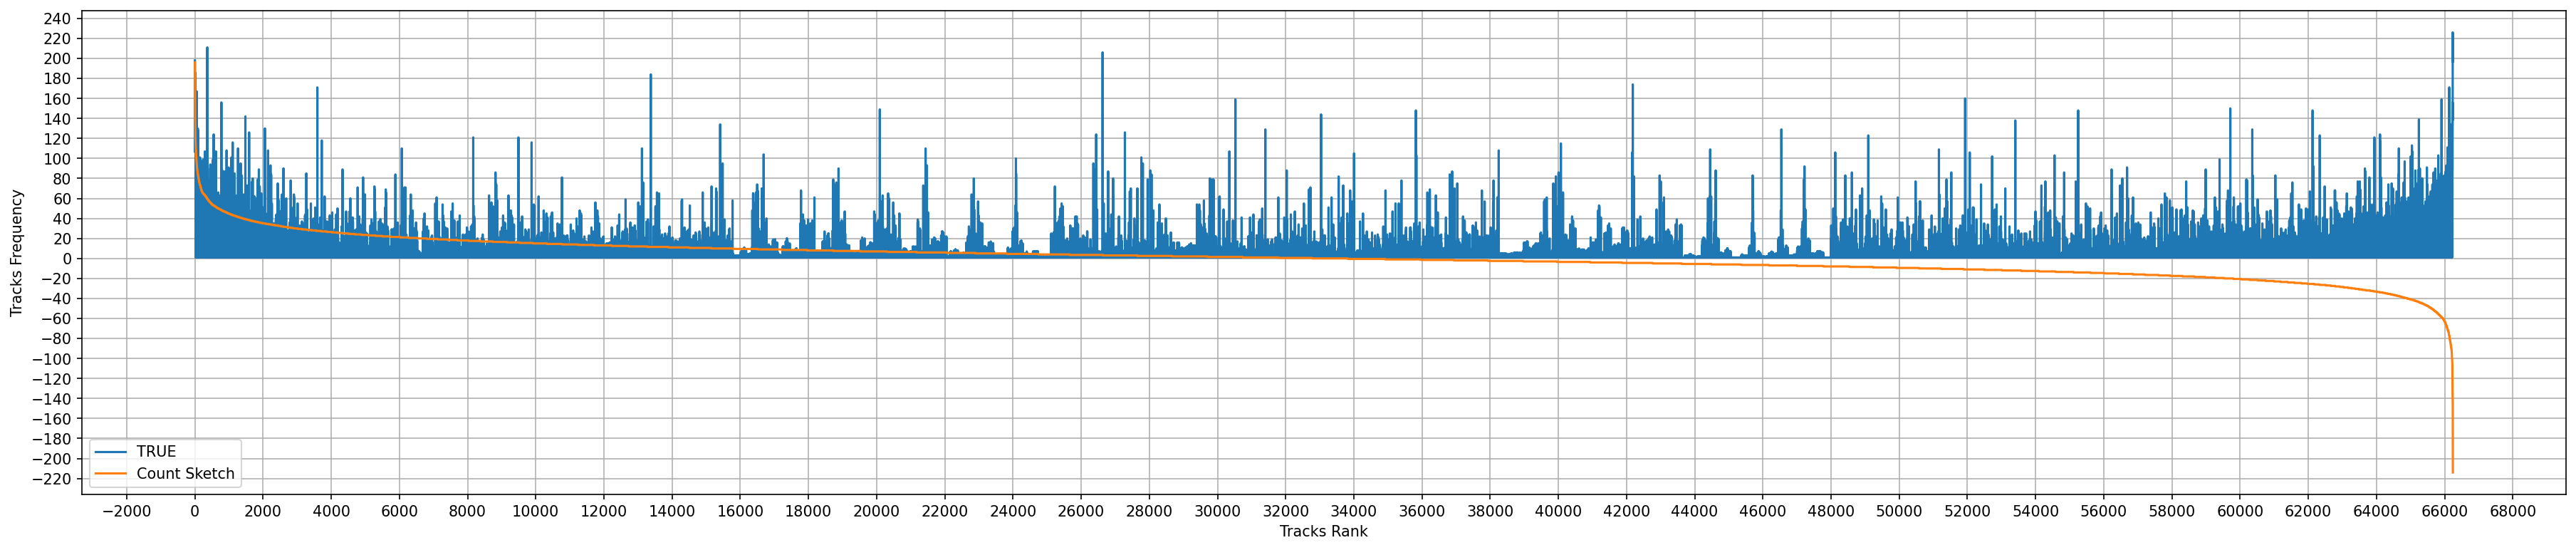

In [37]:
# Plot the estimated frequency in descending order
plt.figure(dpi = 150, figsize = (30,6))
plt.plot(df_true_CS_compare.True_Frequency, label = 'TRUE')
plt.plot(df_true_CS_compare.Est_Frequency, label = 'Count Sketch')
plt.legend(loc = 'lower left')
plt.xlabel("Tracks Rank")
plt.ylabel("Tracks Frequency")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2000))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.grid()
plt.show()

From the above plot, it can observe that when k=20000 and the estimated frequencies are in descending order, the higher true frequencies are roughly distributed at both ends. In other words, some high-frequency tracks are classified as negative values by the Count Sketch algorithm, there are also some high-frequency tracks distributed in the middle.

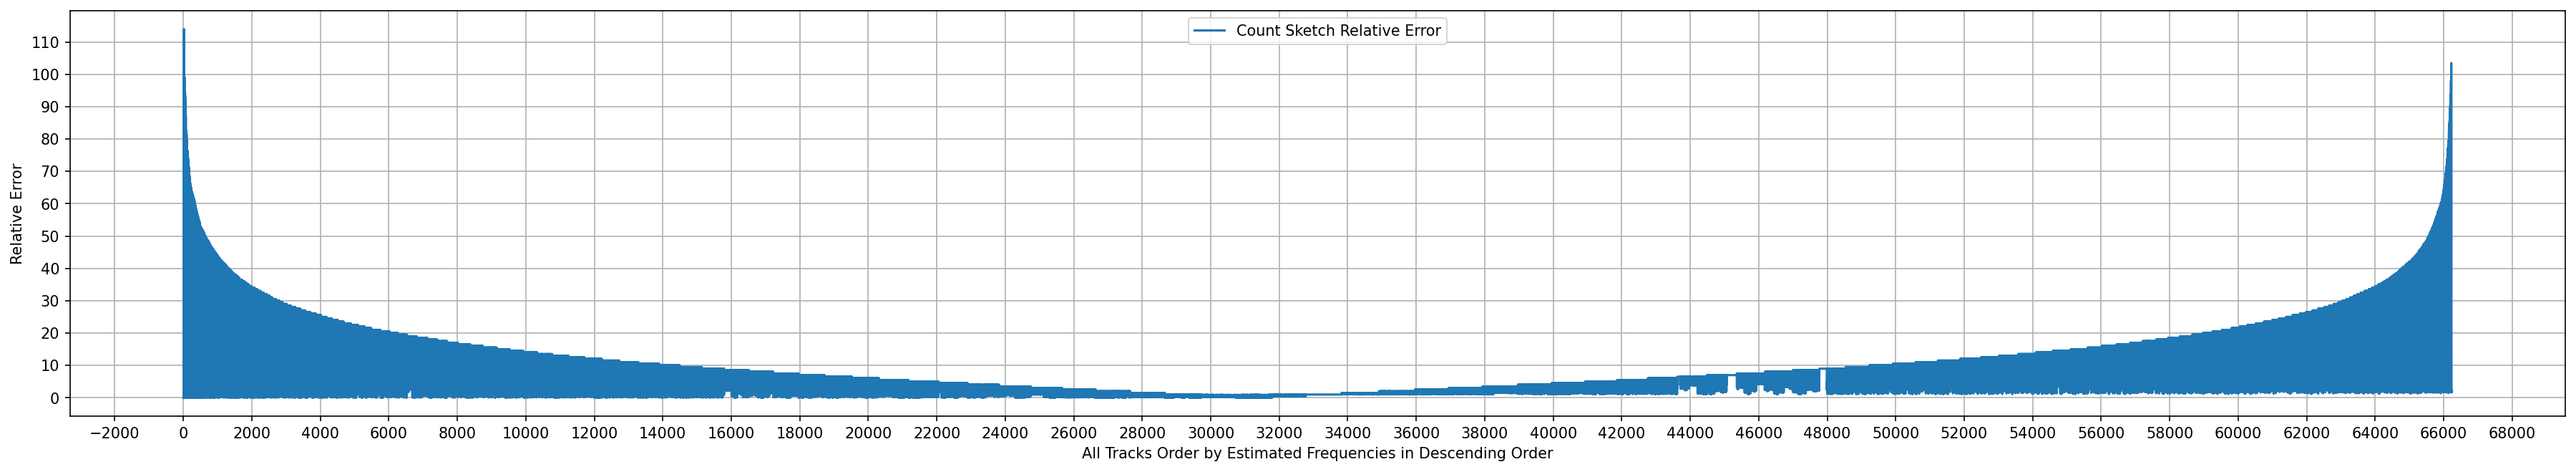

In [38]:
# Plot Relative Error vs estimated frequency rank
plt.figure(dpi = 150, figsize = (30,5))
plt.plot(df_true_CS_compare.Relative_Error, label = 'Count Sketch Relative Error')
plt.legend(loc = 'upper center')
plt.xlabel('All Tracks Order by Estimated Frequencies in Descending Order')
plt.ylabel('Relative Error')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2000))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
plt.grid()
plt.show()

From the above plot, it can observe that when k=20000 and the estimated frequencies are in descending order,  the distribution of relative error of all tracks presents a U-shape with high at both ends and low at the middle.  
Because the Count Sketch algorithm uses hash functions, hash collisions cannot be avoided. At the same time, the sign hash functions produce negative values for some estimated frequencies.

### (c) The impact of the size of k to the avg rel_error across all tracks and the runtime by Misra-Gries (k) and Count Sketch (k = w × d)

In this part, we will choose 5 different k to implement in the Misra-Gries algorithm and the Count Sketch algorithm respectively. At the same time, we will record the runtime of each algorithm. We will explore the impact of different sizes of k on the results of both algorithms.

#### 1. Misra-Gries Approach

k=[3000, 6000, 10000, 20000, 40000], results will be sorted by estimated frequencies in descending order.

##### 1.1 k = 3000

In [39]:
# Set start time
start = time.time()
# Implement Misra-Gries approach to compute the frequencies in descending order
k = 3000
m = trackList
c = collections.Counter(misra_gries(m, k)).most_common()
# Convert Counter result to dataframe
df_MG_3k = Counter_to_dataframe(c)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_MG_3k = round(runtime, 2)
# Generate comparison dataframe
df_MG_3k_compare = pd.merge(df_true, df_MG_3k, on = 'Track_uri', how = 'outer')
df_MG_3k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_MG_3k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'MG_Est_Freq']
df_MG_3k_compare.fillna(0, inplace = True)
df_MG_3k_compare.sort_values(by = ['MG_Est_Freq'], ascending = False, inplace = True)
df_MG_3k_compare.reset_index(drop = True, inplace = True)
df_MG_3k_compare

,Track_name,Track_uri,True_Freq,MG_Est_Freq
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,135.0
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,131.0
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215,126.0
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,120.0
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206,115.0
...,...,...,...,...
66238,Afraid of Time,7lSoQ4jDIP6sTyzrMMe2Ex,2,0.0
66239,A Place Among the Stars,32AaGMEOR21inErpbCpUnq,2,0.0
66240,Running Out,0I9WXFMCidIOawoZYdWHFw,2,0.0
66241,I'm Going Home,0TYY20j7GIY2nNvCqdjiZb,2,0.0


##### 1.2 k = 6000

In [40]:
# Set start time
start = time.time()
# Implement Misra-Gries approach to compute the frequencies in descending order
k = 6000
m = trackList
c = collections.Counter(misra_gries(m, k)).most_common()
# Convert Counter result to dataframe
df_MG_6k = Counter_to_dataframe(c)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_MG_6k = round(runtime, 2)
# Generate comparison dataframe
df_MG_6k_compare = pd.merge(df_true, df_MG_6k, on = 'Track_uri', how = 'outer')
df_MG_6k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_MG_6k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'MG_Est_Freq']
df_MG_6k_compare.fillna(0, inplace = True)
df_MG_6k_compare.sort_values(by = ['MG_Est_Freq'], ascending = False, inplace = True)
df_MG_6k_compare.reset_index(drop = True, inplace = True)
df_MG_6k_compare

,Track_name,Track_uri,True_Freq,MG_Est_Freq
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,186.0
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,182.0
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215,175.0
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,171.0
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206,166.0
...,...,...,...,...
66238,Aquel Lugar,2vHNqDJe1qvt1sroQfNHSI,2,0.0
66239,04 Amor Y Control,51spI0kf2PcCzGlOZthFha,2,0.0
66240,Ya Te Olvidé,5xRBoLVd1vANGUJpcqPUax,2,0.0
66241,Mia,3x4oECarDKCZxecqOYis52,2,0.0


##### 1.3 k = 10000

In [41]:
# Set start time
start = time.time()
# Implement Misra-Gries approach to compute the frequencies in descending order
k = 10000
m = trackList
c = collections.Counter(misra_gries(m, k)).most_common()
# Convert Counter result to dataframe
df_MG_10k = Counter_to_dataframe(c)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_MG_10k = round(runtime, 2)
# Generate comparison dataframe
df_MG_10k_compare = pd.merge(df_true, df_MG_10k, on = 'Track_uri', how = 'outer')
df_MG_10k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_MG_10k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'MG_Est_Freq']
df_MG_10k_compare.fillna(0, inplace = True)
df_MG_10k_compare.sort_values(by = ['MG_Est_Freq'], ascending = False, inplace = True)
df_MG_10k_compare.reset_index(drop = True, inplace = True)
df_MG_10k_compare

,Track_name,Track_uri,True_Freq,MG_Est_Freq
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,206.0
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,202.0
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215,195.0
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,191.0
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206,186.0
...,...,...,...,...
66238,Young Love,0FGuTln8ZqPNHVKpka8xYs,11,0.0
66239,Boom Boom,3RwomkUaNHS0gFs3QqgudU,2,0.0
66240,She's the One,5St2IxnaIYOPflaomWB3Pz,2,0.0
66241,Gimmie Got Shot,4kC5pcHI6bkqCgKemqdDmi,2,0.0


##### 1.4 k = 20000

In [42]:
# Set start time
start = time.time()
# Implement Misra-Gries approach to compute the frequencies in descending order
k = 20000
m = trackList
c = collections.Counter(misra_gries(m, k)).most_common()
# Convert Counter result to dataframe
df_MG_20k = Counter_to_dataframe(c)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_MG_20k = round(runtime, 2)
# Generate comparison dataframe
df_MG_20k_compare = pd.merge(df_true, df_MG_20k, on = 'Track_uri', how = 'outer')
df_MG_20k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_MG_20k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'MG_Est_Freq']
df_MG_20k_compare.fillna(0, inplace = True)
df_MG_20k_compare.sort_values(by = ['MG_Est_Freq'], ascending = False, inplace = True)
df_MG_20k_compare.reset_index(drop = True, inplace = True)
df_MG_20k_compare

,Track_name,Track_uri,True_Freq,MG_Est_Freq
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,219.0
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,215.0
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215,208.0
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,204.0
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206,199.0
...,...,...,...,...
66238,Formerly Known (feat. Co Campbell),5A9Qe31uGQkmbWd94gX3NT,1,0.0
66239,Young (feat. Kb),7EA6cdI785gnFW172RqsYk,1,0.0
66240,Unashamed,4FKsIUZNP1ceqOUrL1Njol,1,0.0
66241,Somebody - Remastered,4jrMslkQYy6HVqKKPX2WXf,1,0.0


##### 1.5 k = 40000

In [43]:
# Set start time
start = time.time()
# Implement Misra-Gries approach to compute the frequencies in descending order
k = 40000
m = trackList
c = collections.Counter(misra_gries(m, k)).most_common()
# Convert Counter result to dataframe
df_MG_40k = Counter_to_dataframe(c)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_MG_40k = round(runtime, 2)
# Generate comparison dataframe
df_MG_40k_compare = pd.merge(df_true, df_MG_40k, on = 'Track_uri', how = 'outer')
df_MG_40k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_MG_40k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'MG_Est_Freq']
df_MG_40k_compare.fillna(0, inplace = True)
df_MG_40k_compare.sort_values(by = ['MG_Est_Freq'], ascending = False, inplace = True)
df_MG_40k_compare.reset_index(drop = True, inplace = True)
df_MG_40k_compare

,Track_name,Track_uri,True_Freq,MG_Est_Freq
0,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,224.0
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,220.0
2,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215,213.0
3,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,209.0
4,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206,204.0
...,...,...,...,...
66238,This Is Love,4MD0T0MNy0yNariTShdRWZ,1,0.0
66239,Over And Over Again - Elephante Remix,1YcQdL5llP3lFYNv3drp0P,1,0.0
66240,To Be Free,1JmQ6MO52sSyEeqtC7T3dr,1,0.0
66241,Oxygen,52z2bOeqyfgmIkXONbU7lq,1,0.0


##### 1.6 The runtime of the Misra-Gries approach

In [44]:
print('When k=3000, Misra-Gries Approach runtime is:', runtime_MG_3k, 'ms')
print('When k=6000, Misra-Gries Approach runtime is:', runtime_MG_6k, 'ms')
print('When k=10000, Misra-Gries Approach runtime is:', runtime_MG_10k, 'ms')
print('When k=20000, Misra-Gries Approach runtime is:', runtime_MG_20k, 'ms')
print('When k=40000, Misra-Gries Approach runtime is:', runtime_MG_40k, 'ms')

When k=3000, Misra-Gries Approach runtime is: 168.55 ms
When k=6000, Misra-Gries Approach runtime is: 184.51 ms
When k=10000, Misra-Gries Approach runtime is: 189.5 ms
When k=20000, Misra-Gries Approach runtime is: 225.91 ms
When k=40000, Misra-Gries Approach runtime is: 226.39 ms


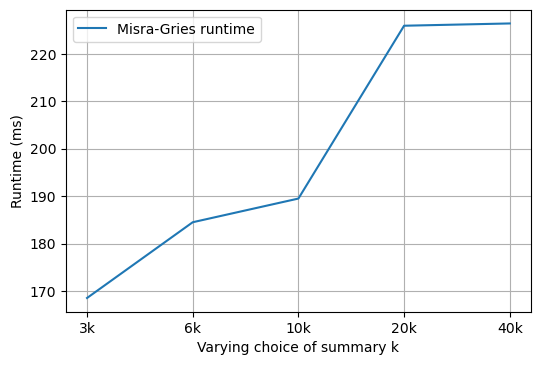

In [45]:
x = ['3k', '6k', '10k', '20k', '40k']
y = [runtime_MG_3k, runtime_MG_6k, runtime_MG_10k, runtime_MG_20k, runtime_MG_40k]
plt.figure(dpi = 100)
plt.plot(x, y, label = 'Misra-Gries runtime')
plt.legend(loc = 'upper left')
plt.xlabel('Varying choice of summary k')
plt.ylabel('Runtime (ms)')
plt.grid()
plt.show()

From the above result, it can be observed that the runtimes of the Misra-Gries algorithm are very fast, in general, the runtime increases as k increases.

##### 1.7 The average relative error across all tracks of the Misra-Gries approach

In [46]:
rel_error_all_MG_3k = abs(1 - sum(df_MG_3k_compare['MG_Est_Freq'] / df_MG_3k_compare['True_Freq']) / 66243)
rel_error_all_MG_6k = abs(1 - sum(df_MG_6k_compare['MG_Est_Freq'] / df_MG_6k_compare['True_Freq']) / 66243)
rel_error_all_MG_10k = abs(1 - sum(df_MG_10k_compare['MG_Est_Freq'] / df_MG_10k_compare['True_Freq']) / 66243)
rel_error_all_MG_20k = abs(1 - sum(df_MG_20k_compare['MG_Est_Freq'] / df_MG_20k_compare['True_Freq']) / 66243)
rel_error_all_MG_40k = abs(1 - sum(df_MG_40k_compare['MG_Est_Freq'] / df_MG_40k_compare['True_Freq']) / 66243)

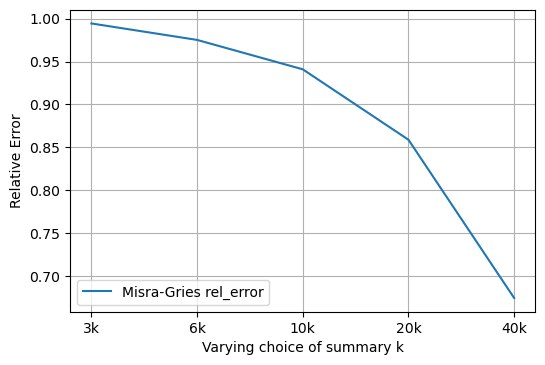

In [47]:
x = ['3k', '6k', '10k', '20k', '40k']
y = [rel_error_all_MG_3k, rel_error_all_MG_6k, rel_error_all_MG_10k, rel_error_all_MG_20k, rel_error_all_MG_40k]
plt.figure(dpi = 100)
plt.plot(x, y, label = 'Misra-Gries rel_error')
plt.legend(loc = 'lower left')
plt.xlabel('Varying choice of summary k')
plt.ylabel('Relative Error')
plt.grid()
plt.show()

From the above result it can be observed that, in general, the relative error of the Misra-Gries algorithm decreases as k increases.

#### 2. Count Sketch Algorithm

k=[3000, 6000, 10000, 20000, 40000], results will be sorted by estimated frequencies in descending order. We will fix d=4 and only adjust the value of w.

##### 2.0 Define function

In [48]:
'''
Note: The following algorithm will take around 60s depending on computer performance.
'''
def Count_Sketch_Algorithm(wdk):
    # Create hash function h = ((ax + b) mod p) mod w
    hash_params = hash_and_sign(wdk[1])[0]
    def h1(x):
        return ((hash_params[0][0] * x + hash_params[0][1]) % hash_params[0][2]) % wdk[0]
    def h2(x):
        return ((hash_params[1][0] * x + hash_params[1][1]) % hash_params[1][2]) % wdk[0]
    def h3(x):
        return ((hash_params[2][0] * x + hash_params[2][1]) % hash_params[2][2]) % wdk[0]
    def h4(x):
        return ((hash_params[3][0] * x + hash_params[3][1]) % hash_params[3][2]) % wdk[0]
    # Create sign hash function s = ((ax + b) mod p) mod 2
    sign_params = hash_and_sign(wdk[1])[1]
    def s1(x):
        return ((sign_params[0][0] * x + sign_params[0][1]) % sign_params[0][2]) % 2
    def s2(x):
        return ((sign_params[1][0] * x + sign_params[1][1]) % sign_params[1][2]) % 2
    def s3(x):
        return ((sign_params[2][0] * x + sign_params[2][1]) % sign_params[2][2]) % 2
    def s4(x):
        return ((sign_params[3][0] * x + sign_params[3][1]) % sign_params[3][2]) % 2
    # Generate hash matrix
    hash_matrix = df_unique_id.copy(deep = True)
    # Calculate hash value and put into matrix
    hash_matrix['h1(x)'] = h1(hash_matrix['Elements'])
    hash_matrix['h2(x)'] = h2(hash_matrix['Elements'])
    hash_matrix['h3(x)'] = h3(hash_matrix['Elements'])
    hash_matrix['h4(x)'] = h4(hash_matrix['Elements'])
    # Transpose to horizontal
    hash_matrix_H = hash_matrix.T
    # Generate sign matrix
    sign_matrix = df_unique_id.copy(deep = True)
    # Calculate sign value and put into matrix
    sign_matrix['s1(x)'] = - s1(sign_matrix['Elements']) | 1
    sign_matrix['s2(x)'] = - s2(sign_matrix['Elements']) | 1
    sign_matrix['s3(x)'] = - s3(sign_matrix['Elements']) | 1
    sign_matrix['s4(x)'] = - s4(sign_matrix['Elements']) | 1
    # Transpose to horizontal
    sign_matrix_H = sign_matrix.T
    # Initialize the counter matrix
    counter_matrix = np.zeros([wdk[1], wdk[0]], int)
    # Compute the estimated frequency for the data stream
    for i in df_with_id['Track_id']:
        hash_value = [hash_matrix_H.iloc[1, i], hash_matrix_H.iloc[2, i],
                      hash_matrix_H.iloc[3, i], hash_matrix_H.iloc[4, i]]
        sign_value = [sign_matrix_H.iloc[1, i], sign_matrix_H.iloc[2, i],
                      sign_matrix_H.iloc[3, i], sign_matrix_H.iloc[4, i]]
        counter_matrix[0][hash_value[0]] += sign_value[0]
        counter_matrix[1][hash_value[1]] += sign_value[1]
        counter_matrix[2][hash_value[2]] += sign_value[2]
        counter_matrix[3][hash_value[3]] += sign_value[3]
    # Convert to dataframe
    counter_matrix_H = pd.DataFrame(counter_matrix)
    counter_matrix_H.index = ['h1(x)', 'h2(x)', 'h3(x)', 'h4(x)']
    # Create a list to store estimated frequency
    Estimated_Frequency = []
    # Find the sign value in counter matrix and calculate the median
    for i in df_unique_id['Elements']:
        # Get the position in counter matrix
        hash_value = [hash_matrix_H.iloc[1, i], hash_matrix_H.iloc[2, i],
                      hash_matrix_H.iloc[3, i], hash_matrix_H.iloc[4, i]]
        # Get sign value
        sign_value_in_counter_matrix = [counter_matrix_H.iloc[0, hash_value[0]],
                                        counter_matrix_H.iloc[1, hash_value[1]],
                                        counter_matrix_H.iloc[2, hash_value[2]],
                                        counter_matrix_H.iloc[3, hash_value[3]]]
        # Calculate the median
        est_freq = np.median(sign_value_in_counter_matrix)
        Estimated_Frequency.append(est_freq)
    # Convert to dataframe
    Est_Freq_matrix = df_unique_id.copy(deep = True)
    Est_Freq_matrix.columns = ['Track_id']
    Est_Freq_matrix['Frequency'] = pd.DataFrame(Estimated_Frequency)
    Est_Freq_matrix['Track_id'] = Est_Freq_matrix['Track_id'].astype(object)
    # Generate unique id dataframe including Track_name and Track_uri
    df_with_unique_id = df_with_id.drop_duplicates(subset = ['Track_uri'])
    # Merge df_with_unique_id and Est_Freq_matrix
    df_CS = pd.merge(df_with_unique_id, Est_Freq_matrix, on = ['Track_id', 'Track_id'])
    # Sort by estimated frequencies in descending order 
    df_CS.sort_values(by = ['Frequency'], ascending = False, inplace = True)
    # Reset index start from 0
    df_CS.reset_index(drop = True, inplace = True)
    return df_CS

##### 2.1 k = 3000

In [49]:
# Set start time
start = time.time()
# Choose parameters
epsilon = 0.05165
delta = 0.0001
# Calculate w, d, k
wdk = calc_wdk(epsilon, delta)
print("w = ", wdk[0], "; d = ", wdk[1], "; k = ", wdk[2], sep = "")

df_CS_3k = Count_Sketch_Algorithm(wdk)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_CS_3k = round(runtime, 2)
# Generate comparison dataframe
df_CS_3k_compare = pd.merge(df_true, df_CS_3k, on = 'Track_uri')
df_CS_3k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_CS_3k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'Track_id', 'CS_Est_Freq']
df_CS_3k_compare.sort_values(by = ['CS_Est_Freq'], ascending = False, inplace = True)
df_CS_3k_compare.reset_index(drop = True, inplace = True)
df_CS_3k_compare

w = 750; d = 4; k = 3000


,Track_name,Track_uri,True_Freq,Track_id,CS_Est_Freq
0,Ride,2Z8WuEywRWYTKe1NybPQEW,144,709,272.0
1,Cold Front,0uqDtgvijc8cHZ7nBdm6um,1,58894,270.5
2,Mexican Radio,1BtOAYgTkPnv1KRcLHqyxO,2,29834,248.0
3,Tomorrow (feat. Taeyang of BIGBANG),0g3R4xQl1dcEYEKcP17Kxd,1,29930,247.0
4,Surround You,4uiOYRpLykOySEncmWhcbK,3,25174,239.5
...,...,...,...,...,...
66238,In Da Club,7iL6o9tox1zgHpKUfh9vuC,113,136,-217.5
66239,Bitch Bad,4CClW2SptqxoGjSxBMQt5A,1,37781,-219.0
66240,Love What You Have,0zl125vFTZjzINnSxBpJgT,1,50847,-226.0
66241,Swimming Pools (Drank),6REbwUNlppTfcnV4d4ZoZi,107,279,-231.0


##### 2.2 k = 6000

In [50]:
# Set start time
start = time.time()
# Choose parameters
epsilon = 0.03652
delta = 0.0001
# Calculate w, d, k
wdk = calc_wdk(epsilon, delta)
print("w = ", wdk[0], "; d = ", wdk[1], "; k = ", wdk[2], sep = "")

df_CS_6k = Count_Sketch_Algorithm(wdk)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_CS_6k = round(runtime, 2)
# Generate comparison dataframe
df_CS_6k_compare = pd.merge(df_true, df_CS_6k, on = 'Track_uri')
df_CS_6k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_CS_6k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'Track_id', 'CS_Est_Freq']
df_CS_6k_compare.sort_values(by = ['CS_Est_Freq'], ascending = False, inplace = True)
df_CS_6k_compare.reset_index(drop = True, inplace = True)
df_CS_6k_compare

w = 1500; d = 4; k = 6000


,Track_name,Track_uri,True_Freq,Track_id,CS_Est_Freq
0,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,665,231.0
1,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,1072,226.5
2,Closer,7BKLCZ1jbUBVqRi2FVlTVw,206,330,221.5
3,In Da Club,7iL6o9tox1zgHpKUfh9vuC,113,136,206.5
4,Father Father,0mDb3QXMdTdUOVFMj9SAPH,1,36891,201.0
...,...,...,...,...,...
66238,American Pie,1fDsrQ23eTAVFElUMaf38X,68,4629,-175.5
66239,Big Rings,7jslhIiELQkgW9IHeYNOWE,90,664,-181.0
66240,Ni**as In Paris,2KpCpk6HjXXLb7nnXoXA5O,159,1252,-182.5
66241,My Shadow,4DXgVdIj9m1Q3cTgjixXZ6,1,46398,-182.5


##### 2.3 k = 10000

In [51]:
# Set start time
start = time.time()
# Choose parameters
epsilon = 0.028285
delta = 0.0001
# Calculate w, d, k
wdk = calc_wdk(epsilon, delta)
print("w = ", wdk[0], "; d = ", wdk[1], "; k = ", wdk[2], sep = "")

df_CS_10k = Count_Sketch_Algorithm(wdk)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_CS_10k = round(runtime, 2)
# Generate comparison dataframe
df_CS_10k_compare = pd.merge(df_true, df_CS_10k, on = 'Track_uri')
df_CS_10k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_CS_10k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'Track_id', 'CS_Est_Freq']
df_CS_10k_compare.sort_values(by = ['CS_Est_Freq'], ascending = False, inplace = True)
df_CS_10k_compare.reset_index(drop = True, inplace = True)
df_CS_10k_compare

w = 2500; d = 4; k = 10000


,Track_name,Track_uri,True_Freq,Track_id,CS_Est_Freq
0,No Role Modelz,62vpWI1CHwFy7tMIcSStl8,211,665,190.0
1,Cruise,0i5el041vd6nxrGEU8QRxy,116,103,175.5
2,Bad and Boujee (feat. Lil Uzi Vert),4Km5HrUvYTaSUfiSGPJeQR,186,1995,165.5
3,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,202,746,159.5
4,Unchangeable,3ZGSxeCpoRGxW89aOys8SX,1,42048,159.0
...,...,...,...,...,...
66238,Blood Stutter,55bwpavHoYVUv55RQ6kzhi,2,19224,-155.5
66239,Only 1,5LB5RjU87USTja29YNTe7S,3,39705,-157.0
66240,Bounce Back,0SGkqnVQo9KPytSri1H6cF,174,190,-167.0
66241,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,667,-168.0


##### 2.4 k = 20000

In [52]:
# Set start time
start = time.time()
# Choose parameters
epsilon = 0.02
delta = 0.0001
# Calculate w, d, k
wdk = calc_wdk(epsilon, delta)
print("w = ", wdk[0], "; d = ", wdk[1], "; k = ", wdk[2], sep = "")

df_CS_20k = Count_Sketch_Algorithm(wdk)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_CS_20k = round(runtime, 2)
# Generate comparison dataframe
df_CS_20k_compare = pd.merge(df_true, df_CS_20k, on = 'Track_uri')
df_CS_20k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_CS_20k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'Track_id', 'CS_Est_Freq']
df_CS_20k_compare.sort_values(by = ['CS_Est_Freq'], ascending = False, inplace = True)
df_CS_20k_compare.reset_index(drop = True, inplace = True)
df_CS_20k_compare

w = 5000; d = 4; k = 20000


,Track_name,Track_uri,True_Freq,Track_id,CS_Est_Freq
0,No Problem (feat. Lil Wayne & 2 Chainz),0v9Wz8o0BT8DU38R4ddjeH,196,3684,217.5
1,One Dance,1xznGGDReH1oQq0xzbwXa3,197,38,202.5
2,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,202,746,193.5
3,Mr. Brightside,7oK9VyNzrYvRFo7nQEYkWN,171,652,188.0
4,White Iverson,6eT7xZZlB2mwyzJ2sUKG6w,159,2007,187.0
...,...,...,...,...,...
66238,Bounce Back,0SGkqnVQo9KPytSri1H6cF,174,190,-161.0
66239,Ni**as In Paris,2KpCpk6HjXXLb7nnXoXA5O,159,1252,-162.5
66240,Fake Love,343YBumqHu19cGoGARUTsd,160,1091,-164.0
66241,679 (feat. Remy Boyz),5NQbUaeTEOGdD6hHcre0dZ,160,514,-170.5


##### 2.5 k = 40000

In [53]:
# Set start time
start = time.time()
# Choose parameters
epsilon = 0.0141425
delta = 0.0001
# Calculate w, d, k
wdk = calc_wdk(epsilon, delta)
print("w = ", wdk[0], "; d = ", wdk[1], "; k = ", wdk[2], sep = "")

df_CS_40k = Count_Sketch_Algorithm(wdk)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_CS_40k = round(runtime, 2)
# Generate comparison dataframe
df_CS_40k_compare = pd.merge(df_true, df_CS_40k, on = 'Track_uri')
df_CS_40k_compare.drop(columns = ['Track_name_y'], inplace = True)
df_CS_40k_compare.columns = ['Track_name', 'Track_uri', 'True_Freq', 'Track_id', 'CS_Est_Freq']
df_CS_40k_compare.sort_values(by = ['CS_Est_Freq'], ascending = False, inplace = True)
df_CS_40k_compare.reset_index(drop = True, inplace = True)
df_CS_40k_compare

w = 10000; d = 4; k = 40000


,Track_name,Track_uri,True_Freq,Track_id,CS_Est_Freq
0,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,202,746,203.5
1,Bad and Boujee (feat. Lil Uzi Vert),4Km5HrUvYTaSUfiSGPJeQR,186,1995,186.5
2,Bounce Back,0SGkqnVQo9KPytSri1H6cF,174,190,183.0
3,679 (feat. Remy Boyz),5NQbUaeTEOGdD6hHcre0dZ,160,514,165.5
4,Panda,5OOkp4U9P9oL23maHFHL1h,159,2902,156.5
...,...,...,...,...,...
66238,One Dance,1xznGGDReH1oQq0xzbwXa3,197,38,-193.0
66239,Gold Digger,5XJJdNPkwmbUwE79gv0NxK,215,1415,-216.5
66240,Broccoli (feat. Lil Yachty),7yyRTcZmCiyzzJlNzGC9Ol,226,667,-217.0
66241,Ignition - Remix,5dNfHmqgr128gMY2tc5CeJ,222,1072,-218.0


##### 2.6 The runtime of the Count Sketch algorithm

In [54]:
print('When k=3000, Count Sketch Algorithm runtime is:', runtime_CS_3k, 'ms')
print('When k=6000, Count Sketch Algorithm runtime is:', runtime_CS_6k, 'ms')
print('When k=10000, Count Sketch Algorithm runtime is:', runtime_CS_10k, 'ms')
print('When k=20000, Count Sketch Algorithm runtime is:', runtime_CS_20k, 'ms')
print('When k=40000, Count Sketch Algorithm runtime is:', runtime_CS_40k, 'ms')

When k=3000, Count Sketch Algorithm runtime is: 68851.11 ms
When k=6000, Count Sketch Algorithm runtime is: 68664.29 ms
When k=10000, Count Sketch Algorithm runtime is: 69121.04 ms
When k=20000, Count Sketch Algorithm runtime is: 67854.73 ms
When k=40000, Count Sketch Algorithm runtime is: 66521.68 ms


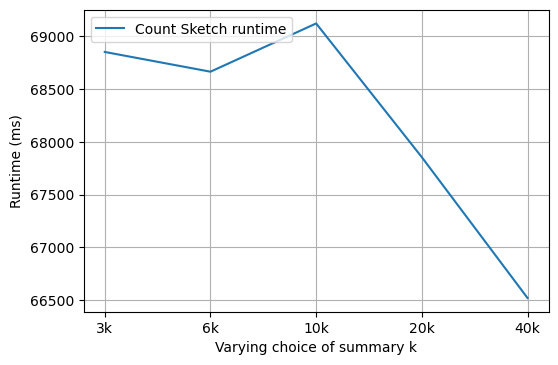

In [55]:
x = ['3k', '6k', '10k', '20k', '40k']
y = [runtime_CS_3k, runtime_CS_6k, runtime_CS_10k, runtime_CS_20k, runtime_CS_40k]
plt.figure(dpi = 100)
plt.plot(x, y, label = 'Count Sketch runtime')
plt.legend(loc = 'upper left')
plt.xlabel('Varying choice of summary k')
plt.ylabel('Runtime (ms)')
plt.grid()
plt.show()

From the above result, it can be observed that the runtimes of the Count Sketch algorithm are very long, with an average time of more than 1 minute.  
Sometimes the runtime increases as k increases, but sometimes it is unstable, depending on the current operating environment and computer performance.

##### 2.7 The average relative error across all tracks of the Count Sketch algorithm

In [56]:
rel_error_all_CS_3k = abs(1 - sum(df_CS_3k_compare['CS_Est_Freq'] / df_CS_3k_compare['True_Freq']) / 66243)
rel_error_all_CS_6k = abs(1 - sum(df_CS_6k_compare['CS_Est_Freq'] / df_CS_6k_compare['True_Freq']) / 66243)
rel_error_all_CS_10k = abs(1 - sum(df_CS_10k_compare['CS_Est_Freq'] / df_CS_10k_compare['True_Freq']) / 66243)
rel_error_all_CS_20k = abs(1 - sum(df_CS_20k_compare['CS_Est_Freq'] / df_CS_20k_compare['True_Freq']) / 66243)
rel_error_all_CS_40k = abs(1 - sum(df_CS_40k_compare['CS_Est_Freq'] / df_CS_40k_compare['True_Freq']) / 66243)

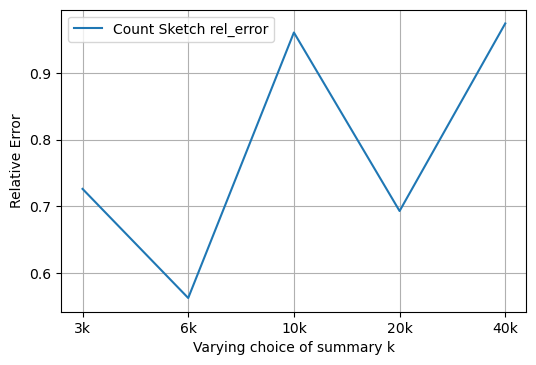

In [57]:
x = ['3k', '6k', '10k', '20k', '40k']
y = [rel_error_all_CS_3k, rel_error_all_CS_6k, rel_error_all_CS_10k, rel_error_all_CS_20k, rel_error_all_CS_40k]
plt.figure(dpi = 100)
plt.plot(x, y, label = 'Count Sketch rel_error')
plt.legend(loc = 'upper left')
plt.xlabel('Varying choice of summary k')
plt.ylabel('Relative Error')
plt.grid()
plt.show()

From the above result, it can be observed that the relative error of the Count Sketch algorithm is unstable, sometimes the relative error decreases with the increase of k, and sometimes it increases with the increase of k. Because of the use of a hash function, a certain of uncertainty is introduced.

#### 3. Plot the runtime and the average relative error of two algorithms together

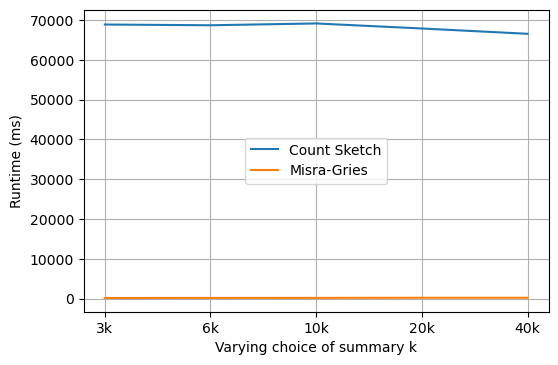

In [58]:
x = ['3k', '6k', '10k', '20k', '40k']
y_CS = [runtime_CS_3k, runtime_CS_6k, runtime_CS_10k, runtime_CS_20k, runtime_CS_40k]
y_MG = [runtime_MG_3k, runtime_MG_6k, runtime_MG_10k, runtime_MG_20k, runtime_MG_40k]
plt.figure(dpi = 100)
plt.plot(x, y_CS, label = 'Count Sketch')
plt.plot(x, y_MG, label = 'Misra-Gries')
plt.legend(loc = 'center')
plt.xlabel('Varying choice of summary k')
plt.ylabel('Runtime (ms)')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10000))
plt.grid()
plt.show()

From the above plot, it can be observed that the runtimes of the Count Sketch algorithm are much higher than that of the Misra-Gries algorithm. When plotting them together, the runtimes of the Misra-Gries algorithm are almost close to 0, while the runtimes of the Count Sketch algorithm are more than 1 minute.

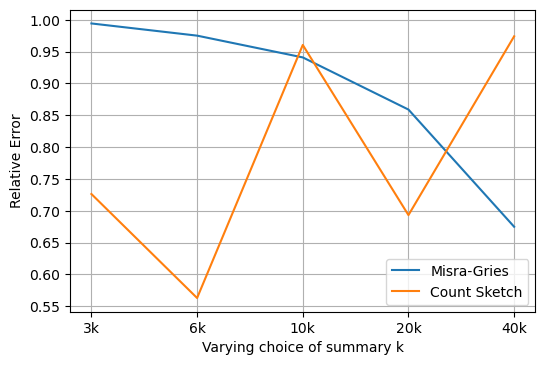

In [59]:
x = ['3k', '6k', '10k', '20k', '40k']
y_MG = [rel_error_all_MG_3k, rel_error_all_MG_6k, rel_error_all_MG_10k, rel_error_all_MG_20k, rel_error_all_MG_40k]
y_CS = [rel_error_all_CS_3k, rel_error_all_CS_6k, rel_error_all_CS_10k, rel_error_all_CS_20k, rel_error_all_CS_40k]
plt.figure(dpi = 100)
plt.plot(x, y_MG, label = 'Misra-Gries')
plt.plot(x, y_CS, label = 'Count Sketch')
plt.legend(loc = 'lower right')
plt.xlabel('Varying choice of summary k')
plt.ylabel('Relative Error')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.grid()
plt.show()

From the above plot, it can be observed that the relative error of the Misra-Gries algorithm decreases steadily with the increase of k, while the relative error of the Count Sketch algorithm sometimes increases and sometimes decreases. But at some point, the overall relative error of the Count Sketch algorithm is much lower than that of the Misra-Gries algorithm.

In general, if we expect to find tracks with higher frequencies (that is, top-ranked tracks), the Misra-Gries algorithm does not require a very large value of k, the estimation ranks are more accurate, and the speed is fast, but it usually underestimates, so its overall relative error is high.  
While if pursuing the lower overall relative error, then the Count Sketch algorithm will be better, although the estimation of the top-ranked tracks is not very accurate. The disadvantage is that it will consume more runtime.

### (d) Report the top-20 frequent tracks by Misra-Gries and Count Sketch Algorithm respectively

In this part, we will choose the parameter k=20000 for Part II (a) and Part III (a) to output the result, sort by estimated frequency in descending order.

In [60]:
# Remove unwanted columns
df_MG_output = df_true_MG_compare.drop(columns = ['Track_uri', 'Difference'])
# Adjust the order of columns
df_MG_output = df_MG_output[['Track_name', 'Est_Frequency', 'True_Frequency', 'Relative_Error']]
df_MG_output.head(20)

,Track_name,Est_Frequency,True_Frequency,Relative_Error
0,Broccoli (feat. Lil Yachty),219,226,0.030973
1,Ignition - Remix,215,222,0.031532
2,Gold Digger,208,215,0.032558
3,No Role Modelz,204,211,0.033175
4,Closer,199,206,0.033981
5,HUMBLE.,195,202,0.034653
6,Jumpman,191,198,0.035354
7,One Dance,190,197,0.035533
8,No Problem (feat. Lil Wayne & 2 Chainz),189,196,0.035714
9,Bad and Boujee (feat. Lil Uzi Vert),179,186,0.037634


In [61]:
# Remove unwanted columns
df_CS_output = df_true_CS_compare.drop(columns = ['Track_uri', 'Track_id', 'Difference'])
# Adjust the order of columns
df_CS_output = df_CS_output[['Track_name', 'Est_Frequency', 'True_Frequency', 'Relative_Error']]
df_CS_output.head(20)

,Track_name,Est_Frequency,True_Frequency,Relative_Error
0,Jumpman,196.0,198,0.010101
1,No Problem (feat. Lil Wayne & 2 Chainz),192.5,196,0.017857
2,Congratulations,178.5,180,0.008333
3,Trap Queen,151.5,154,0.016234
4,Buy U a Drank (Shawty Snappin'),142.5,133,0.071429
5,Bad and Boujee (feat. Lil Uzi Vert),141.0,186,0.241935
6,Come Get Her,139.0,124,0.120968
7,She Will Be Loved - Radio Mix,138.0,106,0.301887
8,No Hands (feat. Roscoe Dash and Wale) - Explic...,136.5,137,0.003650
9,I Don't Fuck With You,136.0,140,0.028571


From the above results, it can be observed that when k=20000, the top-20 ranking of the Misra-Gries algorithm is consistent with the true ranking, and the relative error is stable, around 0.03~0.045.  
The top-20 ranking of the Count Sketch algorithm is different from the true ranking, and the relative error span is very large. The smallest is 0 (that is, the estimated frequency is exactly the same as the true frequency), but the largest is more than 100 (that is, the estimation is wrong).